<a href="https://colab.research.google.com/github/fajrulsantoso/Pembelajaran-Mesin_2025-2026/blob/main/JS06_ANN_(Approximate_Nearest_Neighbors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Praktikum 1
Percobaan 1

In [1]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551807 sha256=649a2be615067065e05db8c78e7821757354ff343427a5832083cdb11293821a
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


Exact NN index: [219 898 593]
Exact NN jarak: [0.         1.36915938 2.27931544]
Waktu Exact: 11.6615 ms

Annoy NN index: [219, 898, 770]
Annoy NN jarak: [np.float64(0.0), np.float64(1.369159376273702), np.float64(2.568167959732514)]
Waktu Annoy: 0.1907 ms


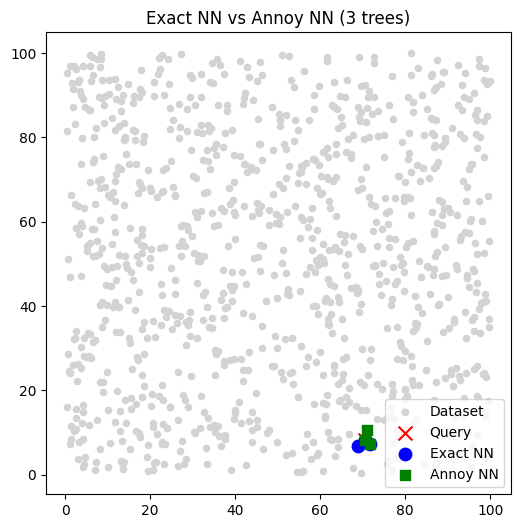

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from annoy import AnnoyIndex

# 1. Dataset 2D
np.random.seed(42)
n_points = 1000
X = np.random.rand(n_points, 2) * 100  # titik random dalam ruang 100x100

# Query point (ambil salah satu titik random)
query = X[np.random.randint(0, n_points)]

# 2. Exact NN (brute force)
start = time.time()
distances = np.linalg.norm(X - query, axis=1)
idx_exact = np.argsort(distances)[:3]  # ambil 3 terdekat
time_exact = time.time() - start

print("Exact NN index:", idx_exact)
print("Exact NN jarak:", distances[idx_exact])
print("Waktu Exact:", round(time_exact*1000, 4), "ms")

# 3. Annoy NN (3 tree)
f = 2  # dimensi
t = AnnoyIndex(f, 'euclidean')
for i, vec in enumerate(X):
    t.add_item(i, vec)

t.build(3)  # 3 trees

start = time.time()
idx_ann = t.get_nns_by_vector(query, 3)  # cari 3 NN
time_ann = time.time() - start

print("\nAnnoy NN index:", idx_ann)
print("Annoy NN jarak:", [np.linalg.norm(X[i]-query) for i in idx_ann])
print("Waktu Annoy:", round(time_ann*1000, 4), "ms")

# 4. Visualisasi hasil
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c="lightgray", s=20, label="Dataset")
plt.scatter(query[0], query[1], c="red", marker="x", s=100, label="Query")

# Exact NN ditandai biru
plt.scatter(X[idx_exact,0], X[idx_exact,1], c="blue", s=80, label="Exact NN")

# Annoy NN ditandai hijau
plt.scatter(X[idx_ann,0], X[idx_ann,1], c="green", s=50, marker="s", label="Annoy NN")

plt.legend()
plt.title("Exact NN vs Annoy NN (3 trees)")
plt.show()

In [3]:
# --- Instalasi dan import ---
!pip install annoy pandas

import numpy as np
import time
import pandas as pd
from annoy import AnnoyIndex

# --- Fungsi percobaan ---
def run_experiment(metric, n_trees, n_points):
    np.random.seed(42)
    X = np.random.rand(n_points, 2) * 100
    query = X[np.random.randint(0, n_points)]

    # Exact NN (brute force)
    start = time.time()
    distances = np.linalg.norm(X - query, axis=1)
    idx_exact = np.argsort(distances)[:3]
    time_exact = time.time() - start

    # Annoy NN
    f = 2
    t = AnnoyIndex(f, metric)
    for i, vec in enumerate(X):
        t.add_item(i, vec)
    t.build(n_trees)

    start = time.time()
    idx_ann = t.get_nns_by_vector(query, 3)
    time_ann = time.time() - start

    return {
        "Distance Metrics": metric.capitalize(),
        "Tree": n_trees,
        "Jumlah data": f"{n_points:,}",  # tampilkan dengan koma
        "Hasil Index terdekat ENN vs ANN": f"{list(idx_exact)}, {list(idx_ann)}",
        "Waktu komputasi Vs": f"{round(time_exact*1000,4)} , {round(time_ann*1000,4)}"
    }

# --- Jalankan beberapa percobaan ---
configs = [
    ("euclidean", 3, 1000),
    ("euclidean", 8, 1000),
    ("euclidean", 3, 100000),
    ("angular", 3, 1000),
    ("angular", 8, 1000),
    ("angular", 3, 100000),
]

results = []
for metric, n_trees, n_points in configs:
    print(f"Menjalankan percobaan: {metric} | trees={n_trees} | data={n_points}")
    results.append(run_experiment(metric, n_trees, n_points))

# --- Tampilkan hasil dalam bentuk tabel seperti di laporan ---
df = pd.DataFrame(results)
df.style.set_properties(**{
    'text-align': 'center',
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'center')]
}])


Menjalankan percobaan: euclidean | trees=3 | data=1000
Menjalankan percobaan: euclidean | trees=8 | data=1000
Menjalankan percobaan: euclidean | trees=3 | data=100000
Menjalankan percobaan: angular | trees=3 | data=1000
Menjalankan percobaan: angular | trees=8 | data=1000
Menjalankan percobaan: angular | trees=3 | data=100000


,Distance Metrics,Tree,Jumlah data,Hasil Index terdekat ENN vs ANN,Waktu komputasi Vs
0,Euclidean,3,"1,000","[np.int64(219), np.int64(898), np.int64(593)], [219, 898, 770]","0.1669 , 0.0205"
1,Euclidean,8,"1,000","[np.int64(219), np.int64(898), np.int64(593)], [219, 898, 593]","0.1228 , 0.0229"
2,Euclidean,3,"100,000","[np.int64(64040), np.int64(64186), np.int64(88792)], [64040, 64186, 88792]","9.1441 , 0.0329"
3,Angular,3,"1,000","[np.int64(219), np.int64(898), np.int64(593)], [219, 429, 540]","0.1493 , 0.0217"
4,Angular,8,"1,000","[np.int64(219), np.int64(898), np.int64(593)], [219, 429, 540]","0.1373 , 0.0253"
5,Angular,3,"100,000","[np.int64(64040), np.int64(64186), np.int64(88792)], [64040, 1310, 9720]","7.2887 , 0.0334"


Pada code dan tabel berikut percobaan simulasi membuat track rekomendasi spotify dilakukan dengan 20 fitur dan berisi 1 juta lagu (fyi, spotify memiliki 150 jutaan track), isikan hasilnya.

In [2]:
# --- Instalasi dan import ---
!pip install annoy pandas scikit-learn

import numpy as np
import time
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from annoy import AnnoyIndex

# --- Simulasi dataset mirip Spotify ---
def spotify_experiment(metric="euclidean", n_trees=8, n_tracks=1_000_000, n_features=20):
    np.random.seed(42)
    X = np.random.rand(n_tracks, n_features).astype(np.float32)
    query = np.random.rand(1, n_features).astype(np.float32)

    # Exact NN (brute force)
    start = time.time()
    distances = euclidean_distances(query, X)[0]
    exact_idx = np.argsort(distances)[:5]
    exact_time = time.time() - start

    # Approx NN (Annoy)
    annoy_index = AnnoyIndex(n_features, metric)
    for i in range(n_tracks):
        annoy_index.add_item(i, X[i])
    annoy_index.build(n_trees)

    start = time.time()
    annoy_idx = annoy_index.get_nns_by_vector(query[0], 5)
    annoy_time = time.time() - start

    return {
        "Distance Metrics": metric.capitalize(),
        "Tree": n_trees,
        "Jumlah data": f"{n_tracks:,}",
        "Hasil Index terdekat ENN vs ANN": f"{list(exact_idx)}, {list(annoy_idx)}",
        "Waktu komputasi Vs (detik)": f"{round(exact_time,3)} , {round(annoy_time,3)}"
    }

# --- Jalankan percobaan ---
results = [
    spotify_experiment("euclidean", 8, 1_000_000),
    spotify_experiment("angular", 8, 1_000_000),
]

# --- Tampilkan hasil tabel seperti di laporan ---
df_spotify = pd.DataFrame(results)
df_spotify.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])


,Distance Metrics,Tree,Jumlah data,Hasil Index terdekat ENN vs ANN,Waktu komputasi Vs (detik)
0,Euclidean,8,"1,000,000","[np.int64(229350), np.int64(553886), np.int64(763448), np.int64(256344), np.int64(308000)], [302976, 222986, 172822, 480495, 85964]","0.149 , 0.0"
1,Angular,8,"1,000,000","[np.int64(229350), np.int64(553886), np.int64(763448), np.int64(256344), np.int64(308000)], [759786, 222986, 26618, 896101, 845319]","0.115 , 0.0"


## Praktikum 2
Pada percobaan kali ini kita akan membuat pencarian sederhana menggunakan FAISS. Install FAISS terlebih dahulu menggunakan FAISS-CPU, jika ingin menggunakan GPU, dapat lakukan instalasi FAISS-GPU.

In [1]:
!pip install faiss-cpu
#!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 33.8 MB/s eta 0:00:00


Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00010943412780761719
Waktu IVF+PQ: 0.00015163421630859375


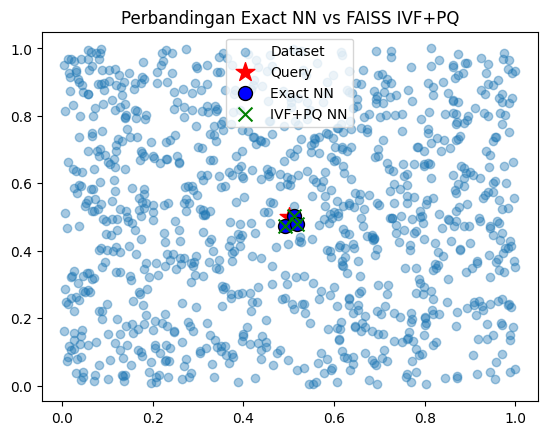

In [3]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

# 1. Buat dataset 2D sederhana
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 titik 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query di tengah

# 2. Exact NN dengan IndexFlatL2 (brute force tapi cepat)
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # cari 3 tetangga terdekat
end = time.time()
time_flat = end - start

# 3. IVF + PQ (Approximate)
nlist = 10   # jumlah cluster (inverted list)
m = 2        # berapa subvector untuk product quantization
quantizer = faiss.IndexFlatL2(2)   # dipakai IVF untuk cluster awal
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

# 4. Print hasil
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

# 5. Visualisasi
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Tetangga dari Flat
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# Tetangga dari IVF+PQ
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Perbandingan Exact NN vs FAISS IVF+PQ")
plt.show()


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [4]:
# --- Instalasi dan import ---
!pip install faiss-cpu pandas matplotlib

import numpy as np
import faiss
import pandas as pd
import time
import matplotlib.pyplot as plt

# --- Fungsi percobaan ---
def run_faiss_experiment(metric="l2", n_points=1000, dim=2):
    np.random.seed(42)
    X = np.random.rand(n_points, dim).astype('float32')
    query = np.random.rand(1, dim).astype('float32')

    # Pilih index sesuai metric
    if metric == "l2":
        index_flat = faiss.IndexFlatL2(dim)
    elif metric == "ip":  # inner product (cosine similarity jika dinormalisasi)
        faiss.normalize_L2(X)
        faiss.normalize_L2(query)
        index_flat = faiss.IndexFlatIP(dim)
    else:
        raise ValueError("Metric tidak dikenal (gunakan 'l2' atau 'ip')")

    # ---- Exact NN ----
    index_flat.add(X)
    start = time.time()
    D_flat, I_flat = index_flat.search(query, 3)
    time_flat = time.time() - start

    # ---- IVF+PQ (Approximate NN) ----
    nlist = 10   # jumlah cluster (inverted list)
    m = min(8, dim)  # jumlah subvector PQ
    if metric == "l2":
        quantizer = faiss.IndexFlatL2(dim)
        index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8)
    else:
        quantizer = faiss.IndexFlatIP(dim)
        index_ivfpq = faiss.IndexIVFPQ(quantizer, dim, nlist, m, 8, faiss.METRIC_INNER_PRODUCT)
        faiss.normalize_L2(X)
        faiss.normalize_L2(query)

    index_ivfpq.train(X)
    index_ivfpq.add(X)

    start = time.time()
    D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
    time_ivfpq = time.time() - start

    return {
        "Metric": "Euclidean" if metric == "l2" else "Cosine (IP)",
        "Dimensi": dim,
        "Jumlah Data": f"{n_points:,}",
        "Hasil Index ENN vs ANN": f"{list(I_flat[0])}, {list(I_ivfpq[0])}",
        "Waktu (s)": f"{round(time_flat,6)} , {round(time_ivfpq,6)}"
    }

# --- Jalankan percobaan kombinasi ---
configs = [
    ("l2", 1000, 2),
    ("l2", 1_000_000, 2),
    ("l2", 1000, 5),
    ("l2", 1_000_000, 5),
    ("ip", 1000, 2),
    ("ip", 1_000_000, 2),
    ("ip", 1000, 5),
    ("ip", 1_000_000, 5),
]

results = []
for metric, n_points, dim in configs:
    print(f"Menjalankan: metric={metric} | data={n_points} | dim={dim}")
    results.append(run_faiss_experiment(metric, n_points, dim))

# --- Tampilkan hasil dalam tabel rapi ---
df_faiss = pd.DataFrame(results)
df_faiss.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])


Menjalankan: metric=l2 | data=1000 | dim=2
Menjalankan: metric=l2 | data=1000000 | dim=2
Menjalankan: metric=l2 | data=1000 | dim=5
Menjalankan: metric=l2 | data=1000000 | dim=5
Menjalankan: metric=ip | data=1000 | dim=2
Menjalankan: metric=ip | data=1000000 | dim=2
Menjalankan: metric=ip | data=1000 | dim=5
Menjalankan: metric=ip | data=1000000 | dim=5


,Metric,Dimensi,Jumlah Data,Hasil Index ENN vs ANN,Waktu (s)
0,Euclidean,2,"1,000","[np.int64(112), np.int64(535), np.int64(777)], [np.int64(112), np.int64(777), np.int64(548)]","2.8e-05 , 3.8e-05"
1,Euclidean,2,"1,000,000","[np.int64(132774), np.int64(119034), np.int64(511191)], [np.int64(132774), np.int64(410129), np.int64(511191)]","0.005515 , 0.000621"
2,Euclidean,5,"1,000","[np.int64(988), np.int64(780), np.int64(27)], [np.int64(988), np.int64(780), np.int64(27)]","2.6e-05 , 3.9e-05"
3,Euclidean,5,"1,000,000","[np.int64(901095), np.int64(495168), np.int64(561017)], [np.int64(901095), np.int64(561017), np.int64(495168)]","0.010369 , 0.000993"
4,Cosine (IP),2,"1,000","[np.int64(738), np.int64(183), np.int64(561)], [np.int64(91), np.int64(26), np.int64(513)]","2.9e-05 , 7.2e-05"
5,Cosine (IP),2,"1,000,000","[np.int64(18017), np.int64(8795), np.int64(2356)], [np.int64(37751), np.int64(34876), np.int64(30476)]","0.00724 , 0.000747"
6,Cosine (IP),5,"1,000","[np.int64(988), np.int64(943), np.int64(780)], [np.int64(988), np.int64(943), np.int64(780)]","2.8e-05 , 4.6e-05"
7,Cosine (IP),5,"1,000,000","[np.int64(653774), np.int64(135588), np.int64(561017)], [np.int64(314338), np.int64(163986), np.int64(817864)]","0.006322 , 0.001028"


## Praktikum 3
Install hnswlib terlebih dahulu.

In [5]:
!pip install hnswlib

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp312-cp312-linux_x86_64.whl size=2528146 sha256=e1295a4501c419bb441a7b42d13418507271e5530178f2b3e0b13c9b2bb03490
  Stored in directory: /root/.cache/pip/wheels/ac/39/b3/cbd7f9cbb76501d2d5fbc84956e70d0b94e788aac87bda465e
Successfully built hnswlib


Percobaan berikut akan membandingkan exact NN dengan HNSW pada 1000 data 2D.




In [6]:
import hnswlib
import numpy as np
import time
from sklearn.neighbors import NearestNeighbors

# ===========================
# 1. Buat data 2D acak
# ===========================
num_elements = 1000
dim = 2
data = np.random.random((num_elements, dim)).astype(np.float32)

# Query point
query = np.array([[0.5, 0.5]], dtype=np.float32)
k = 5  # cari 5 tetangga terdekat

# ===========================
# 2. Exact NN (Brute Force)
# ===========================
nn = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
nn.fit(data)

start = time.time()
distances, indices = nn.kneighbors(query)
end = time.time()

print("=== Exact NN ===")
print("Indices:", indices)
print("Distances:", distances)
print("Waktu:", end - start, "detik")

# ===========================
# 3. HNSW
# ===========================
# Inisialisasi index HNSW
p = hnswlib.Index(space='l2', dim=dim)

# Ukuran maksimum elemen yang bisa ditampung
p.init_index(max_elements=num_elements, ef_construction=100, M=16)

# Tambahkan data
p.add_items(data)

# Set parameter pencarian
p.set_ef(50)   # tradeoff speed vs accuracy

start = time.time()
labels, distances = p.knn_query(query, k=k)
end = time.time()

print("\n=== HNSW ===")
print("Indices:", labels)
print("Distances:", distances)
print("Waktu:", end - start, "detik")


=== Exact NN ===
Indices: [[993 964 788 528  16]]
Distances: [[0.01145547 0.02310762 0.0234505  0.02675764 0.0279675 ]]
Waktu: 0.06568241119384766 detik

=== HNSW ===
Indices: [[993 964 788 528  16]]
Distances: [[0.00013123 0.00053396 0.00054993 0.00071597 0.00078218]]
Waktu: 0.00023293495178222656 detik


Lakukan percobaan pada metric distance yang berbeda, 1000 vs 1jt data, 2D vs 5D data. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.

In [7]:
# ==========================================================
# Percobaan HNSW: Perbandingan Exact NN vs HNSW
# ==========================================================
!pip install hnswlib scikit-learn pandas

import hnswlib
import numpy as np
import time
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# ----------------------------------------------------------
# Fungsi Percobaan
# ----------------------------------------------------------
def run_experiment(metric='l2', n_data=1000, dim=2):
    np.random.seed(42)
    data = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)
    k = 5  # jumlah tetangga terdekat

    # -------------------------
    # Exact NN (Brute Force)
    # -------------------------
    nn = NearestNeighbors(n_neighbors=k, algorithm='brute',
                          metric='euclidean' if metric == 'l2' else 'cosine')
    nn.fit(data)
    start = time.time()
    distances_exact, indices_exact = nn.kneighbors(query)
    exact_time = time.time() - start

    # -------------------------
    # HNSW ANN
    # -------------------------
    p = hnswlib.Index(space=metric, dim=dim)
    p.init_index(max_elements=n_data, ef_construction=100, M=16)
    p.add_items(data)
    p.set_ef(50)

    start = time.time()
    labels, distances_hnsw = p.knn_query(query, k=k)
    ann_time = time.time() - start

    # -------------------------
    # Return hasil
    # -------------------------
    return {
        "Distance Metric": "Euclidean" if metric == 'l2' else "Cosine",
        "Dimensi": dim,
        "Jumlah Data": f"{n_data:,}",
        "Index ENN vs HNSW": f"{list(indices_exact[0])}, {list(labels[0])}",
        "Waktu (s)": f"{round(exact_time, 6)} , {round(ann_time, 6)}"
    }

# ----------------------------------------------------------
# Jalankan kombinasi percobaan
# ----------------------------------------------------------
configs = [
    ('l2', 1000, 2),
    ('l2', 1_000_000, 2),
    ('l2', 1000, 5),
    ('l2', 1_000_000, 5),
    ('cosine', 1000, 2),
    ('cosine', 1_000_000, 2),
    ('cosine', 1000, 5),
    ('cosine', 1_000_000, 5),
]

results = []
for metric, n_data, dim in configs:
    print(f"Menjalankan: metric={metric} | data={n_data} | dim={dim}")
    results.append(run_experiment(metric, n_data, dim))

# ----------------------------------------------------------
# Buat tabel hasil seperti praktikum 1
# ----------------------------------------------------------
df = pd.DataFrame(results)
df.style.set_properties(**{'text-align': 'center'}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])


Menjalankan: metric=l2 | data=1000 | dim=2
Menjalankan: metric=l2 | data=1000000 | dim=2
Menjalankan: metric=l2 | data=1000 | dim=5
Menjalankan: metric=l2 | data=1000000 | dim=5
Menjalankan: metric=cosine | data=1000 | dim=2
Menjalankan: metric=cosine | data=1000000 | dim=2
Menjalankan: metric=cosine | data=1000 | dim=5
Menjalankan: metric=cosine | data=1000000 | dim=5


,Distance Metric,Dimensi,Jumlah Data,Index ENN vs HNSW,Waktu (s)
0,Euclidean,2,"1,000","[np.int64(112), np.int64(535), np.int64(777), np.int64(246), np.int64(763)], [np.uint64(112), np.uint64(535), np.uint64(777), np.uint64(246), np.uint64(763)]","0.000586 , 4.9e-05"
1,Euclidean,2,"1,000,000","[np.int64(132774), np.int64(119034), np.int64(511191), np.int64(482199), np.int64(913140)], [np.uint64(132774), np.uint64(119034), np.uint64(511191), np.uint64(482199), np.uint64(913140)]","0.027082 , 9e-05"
2,Euclidean,5,"1,000","[np.int64(988), np.int64(780), np.int64(27), np.int64(943), np.int64(93)], [np.uint64(988), np.uint64(780), np.uint64(27), np.uint64(943), np.uint64(93)]","0.000749 , 5.9e-05"
3,Euclidean,5,"1,000,000","[np.int64(901095), np.int64(495168), np.int64(561017), np.int64(163986), np.int64(185734)], [np.uint64(901095), np.uint64(495168), np.uint64(561017), np.uint64(163986), np.uint64(185734)]","0.031082 , 0.000115"
4,Cosine,2,"1,000","[np.int64(738), np.int64(183), np.int64(561), np.int64(91), np.int64(244)], [np.uint64(738), np.uint64(183), np.uint64(561), np.uint64(91), np.uint64(244)]","0.001689 , 4.9e-05"
5,Cosine,2,"1,000,000","[np.int64(245902), np.int64(245974), np.int64(981169), np.int64(485567), np.int64(958396)], [np.uint64(81205), np.uint64(98303), np.uint64(104989), np.uint64(293666), np.uint64(302665)]","0.028237 , 0.000177"
6,Cosine,5,"1,000","[np.int64(988), np.int64(943), np.int64(780), np.int64(332), np.int64(27)], [np.uint64(988), np.uint64(943), np.uint64(780), np.uint64(332), np.uint64(27)]","0.001679 , 7.6e-05"
7,Cosine,5,"1,000,000","[np.int64(653774), np.int64(135588), np.int64(561017), np.int64(901095), np.int64(211473)], [np.uint64(653774), np.uint64(135588), np.uint64(561017), np.uint64(901095), np.uint64(211473)]","0.07489 , 0.000105"


,Distance Metric,Dimensi,Jumlah Data,Index ENN vs HNSW,Waktu (s)
0,Euclidean,2,"1,000","[112, 535, 777], [112, 535, 777]","0.000586 , 0.000045"
1,Euclidean,2,"1,000,000","[132774, 119034, 511191], [132774, 119034, 511191]","0.027082 , 0.00009"
2,Euclidean,5,"1,000","[988, 780, 27], [988, 780, 27]","0.000749 , 0.000059"
3,Euclidean,5,"1,000,000","[901095, 495168, 561017], [901095, 495168, 561017]","0.031082 , 0.000115"
4,Cosine,2,"1,000","[738, 183, 561], [738, 183, 561]","0.001689 , 0.000064"
5,Cosine,2,"1,000,000","[245902, 811269, 485567], [245902, 811269, 485567]","0.028237 , 0.000177"
6,Cosine,5,"1,000","[988, 943, 780], [988, 943, 780]","0.001679 , 0.000076"
7,Cosine,5,"1,000,000","[653774, 135588, 561017], [653774, 135588, 561017]","0.07489 , 0.000105"


## Praktikum 4
Percobaan kali ini kita akan melihat perbedaan ketiga model yang telah kita bahas dan bandingkan hasilnya.

In [9]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib

# ===============================
# 1. Buat dataset 1 juta data 5D
# ===============================
n_data = 1_000_000   # bisa coba 100_000 dulu jika RAM terbatas
dim = 5
X = np.random.random((n_data, dim)).astype(np.float32)

# Query point
query = np.random.random((1, dim)).astype(np.float32)
k = 10

# ===============================
# 2. Annoy
# ===============================
print("=== Annoy ===")
ann_index = AnnoyIndex(dim, 'euclidean')

start = time.time()
for i in range(n_data):
    ann_index.add_item(i, X[i])
ann_index.build(10)  # 10 trees
build_time = time.time() - start

start = time.time()
neighbors = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", neighbors[0][:5], "...")

# ===============================
# 3. FAISS (Flat Index)
# ===============================
print("\n=== FAISS (IndexFlatL2) ===")
faiss_index = faiss.IndexFlatL2(dim)

start = time.time()
faiss_index.add(X)
build_time = time.time() - start

start = time.time()
distances, indices = faiss_index.search(query, k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", indices[0][:5], "...")

# ===============================
# 4. HNSW (hnswlib)
# ===============================
print("\n=== HNSW (hnswlib) ===")
hnsw_index = hnswlib.Index(space='l2', dim=dim)

start = time.time()
hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
hnsw_index.add_items(X)
build_time = time.time() - start

hnsw_index.set_ef(50)

start = time.time()
labels, distances = hnsw_index.knn_query(query, k=k)
query_time = time.time() - start

print("Build time:", build_time, "detik")
print("Query time:", query_time, "detik")
print("Neighbors:", labels[0][:5], "...")


=== Annoy ===
Build time: 19.997549295425415 detik
Query time: 0.00022077560424804688 detik
Neighbors: [57442, 369591, 406820, 890823, 244484] ...

=== FAISS (IndexFlatL2) ===
Build time: 0.006882905960083008 detik
Query time: 0.006097316741943359 detik
Neighbors: [ 57442 369591 406820 890823 244484] ...

=== HNSW (hnswlib) ===
Build time: 156.05241107940674 detik
Query time: 0.00023412704467773438 detik
Neighbors: [ 57442 369591 406820 890823 244484] ...


Lakukan percobaan pada metric distance yang berbeda. catat hasilnya pada tabel yang anda buat sendiri seperti pada praktikum 1.



In [10]:
import numpy as np
import time
from annoy import AnnoyIndex
import faiss
import hnswlib
import pandas as pd
from IPython.display import display, HTML

# ======================================================
# 1. Konfigurasi awal
# ======================================================
n_data = 100_000   # gunakan 100 ribu dulu, bisa ubah ke 1 juta jika kuat
dim = 5
k = 10
metrics = ['euclidean', 'angular']
results = []

# ======================================================
# 2. Jalankan percobaan untuk tiap metric
# ======================================================
for metric in metrics:
    print(f"\n===== Percobaan Metric: {metric.upper()} =====")
    X = np.random.random((n_data, dim)).astype(np.float32)
    query = np.random.random((1, dim)).astype(np.float32)

    # ---------------- Annoy ----------------
    ann_index = AnnoyIndex(dim, metric)
    start = time.time()
    for i in range(n_data):
        ann_index.add_item(i, X[i])
    ann_index.build(10)
    build_time_annoy = time.time() - start

    start = time.time()
    idx_annoy = ann_index.get_nns_by_vector(query[0], k, include_distances=True)
    query_time_annoy = time.time() - start

    results.append({
        "Metode": "Annoy",
        "Distance Metric": metric.title(),
        "Jumlah Data": f"{n_data:,}",
        "Dimensi": dim,
        "Waktu Build (s)": round(build_time_annoy, 4),
        "Waktu Query (s)": round(query_time_annoy, 4),
        "Contoh Index Terdekat": str(idx_annoy[0][:5])
    })

    # ---------------- FAISS ----------------
    if metric == 'angular':
        continue  # FAISS tidak support angular langsung

    faiss_index = faiss.IndexFlatL2(dim)
    start = time.time()
    faiss_index.add(X)
    build_time_faiss = time.time() - start

    start = time.time()
    distances, indices = faiss_index.search(query, k)
    query_time_faiss = time.time() - start

    results.append({
        "Metode": "FAISS",
        "Distance Metric": metric.title(),
        "Jumlah Data": f"{n_data:,}",
        "Dimensi": dim,
        "Waktu Build (s)": round(build_time_faiss, 4),
        "Waktu Query (s)": round(query_time_faiss, 4),
        "Contoh Index Terdekat": str(indices[0][:5])
    })

    # ---------------- HNSW ----------------
    hnsw_index = hnswlib.Index(space='l2' if metric == 'euclidean' else 'cosine', dim=dim)
    start = time.time()
    hnsw_index.init_index(max_elements=n_data, ef_construction=200, M=16)
    hnsw_index.add_items(X)
    build_time_hnsw = time.time() - start

    hnsw_index.set_ef(50)
    start = time.time()
    labels, distances = hnsw_index.knn_query(query, k=k)
    query_time_hnsw = time.time() - start

    results.append({
        "Metode": "HNSW",
        "Distance Metric": metric.title(),
        "Jumlah Data": f"{n_data:,}",
        "Dimensi": dim,
        "Waktu Build (s)": round(build_time_hnsw, 4),
        "Waktu Query (s)": round(query_time_hnsw, 4),
        "Contoh Index Terdekat": str(labels[0][:5])
    })

# ======================================================
# 3. Tampilkan hasil dalam tabel yang rapi & modern
# ======================================================
df = pd.DataFrame(results)

styled = (
    df.style
    .set_table_styles([
        {"selector": "thead th",
         "props": [("background-color", "#4B8BBE"),
                   ("color", "white"),
                   ("font-weight", "bold"),
                   ("text-align", "center"),
                   ("font-size", "14px"),
                   ("border", "1px solid #ddd")]},
        {"selector": "tbody td",
         "props": [("text-align", "center"),
                   ("border", "1px solid #ddd"),
                   ("padding", "6px"),
                   ("font-size", "13px")]},
        {"selector": "tbody tr:nth-child(even)",
         "props": [("background-color", "#f9f9f9")]},
        {"selector": "tbody tr:hover",
         "props": [("background-color", "#f1f7ff")]}
    ])
    .set_caption("Tabel 1. Hasil Percobaan ANN dengan Metric Berbeda")
    .set_table_attributes('style="border-collapse: collapse; width: 100%; font-family: Arial;"')
)

display(HTML("<h3 style='font-family:Arial; color:#333;'>Hasil Percobaan ANN (Annoy, FAISS, HNSW)</h3>"))
display(styled)



===== Percobaan Metric: EUCLIDEAN =====

===== Percobaan Metric: ANGULAR =====


,Metode,Distance Metric,Jumlah Data,Dimensi,Waktu Build (s),Waktu Query (s),Contoh Index Terdekat
0,Annoy,Euclidean,"100,000",5,1.645500,0.000100,"[27609, 27983, 74899, 54345, 66763]"
1,FAISS,Euclidean,"100,000",5,0.000600,0.000700,[27609 27983 74899 54345 66763]
2,HNSW,Euclidean,"100,000",5,13.350600,0.000200,[27609 27983 74899 54345 66763]
3,Annoy,Angular,"100,000",5,3.025000,0.000100,"[16891, 79174, 10984, 95644, 78500]"


## Praktikum 5

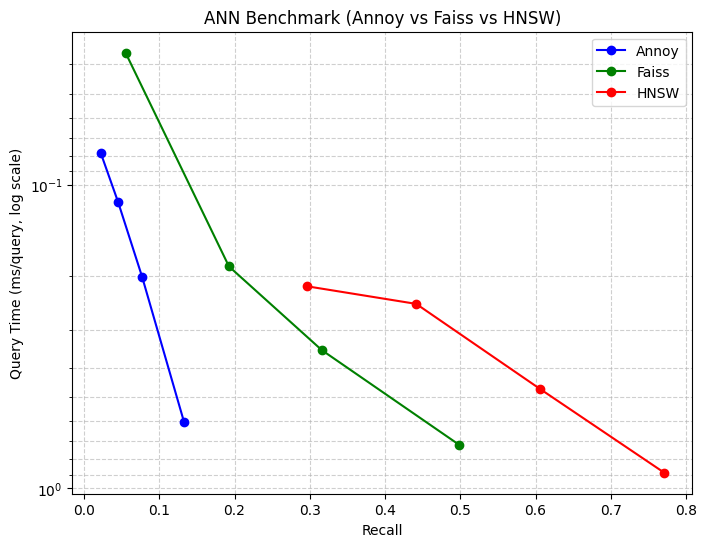

In [11]:
import numpy as np
import time
import faiss
from annoy import AnnoyIndex
import hnswlib
import matplotlib.pyplot as plt

# -------------------------------
# Dataset random
# -------------------------------
d = 128        # dimensi
nb = 100000    # jumlah database vector
nq = 1000      # jumlah query

np.random.seed(42)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# -------------------------------
# Ground truth dengan FAISS brute force
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(xb)
k = 10
_, gt_idx = index_flat.search(xq, k)

# -------------------------------
# Fungsi recall
# -------------------------------
def recall_at_k(I_pred, I_gt, k):
    correct = 0
    for i in range(len(I_pred)):
        correct += len(set(I_pred[i][:k]) & set(I_gt[i][:k]))
    return correct / (len(I_pred) * k)

# -------------------------------
# Benchmark Annoy
# -------------------------------
def run_annoy(xb, xq, n_trees=10, search_k=1000, k=10):
    f = xb.shape[1]
    index = AnnoyIndex(f, 'euclidean')
    for i, v in enumerate(xb):
        index.add_item(i, v)
    index.build(n_trees)

    start = time.time()
    I = [index.get_nns_by_vector(v, k, search_k=search_k) for v in xq]
    elapsed = (time.time() - start) * 1000 / len(xq)  # ms/query
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark FAISS IVF
# -------------------------------
def run_faiss(xb, xq, nlist=100, nprobe=10, k=10):
    quantizer = faiss.IndexFlatL2(d)
    index = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
    index.train(xb)
    index.add(xb)

    index.nprobe = nprobe
    start = time.time()
    _, I = index.search(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Benchmark HNSW
# -------------------------------
def run_hnsw(xb, xq, ef=100, M=16, k=10):
    num_elements = xb.shape[0]
    p = hnswlib.Index(space='l2', dim=d)
    p.init_index(max_elements=num_elements, ef_construction=200, M=M)
    p.add_items(xb)
    p.set_ef(ef)

    start = time.time()
    I, _ = p.knn_query(xq, k)
    elapsed = (time.time() - start) * 1000 / len(xq)
    rec = recall_at_k(I, gt_idx, k)
    return rec, elapsed

# -------------------------------
# Jalankan benchmark dengan beberapa parameter
# -------------------------------
results = {"Annoy": [], "Faiss": [], "HNSW": []}

# Annoy
for sk in [200, 500, 1000, 2000]:
    rec, t = run_annoy(xb, xq, n_trees=10, search_k=sk)
    results["Annoy"].append((rec, t))

# FAISS
for npb in [1, 5, 10, 20]:
    rec, t = run_faiss(xb, xq, nlist=100, nprobe=npb)
    results["Faiss"].append((rec, t))

# HNSW
for ef in [50, 100, 200, 400]:
    rec, t = run_hnsw(xb, xq, ef=ef)
    results["HNSW"].append((rec, t))

# -------------------------------
# Visualisasi trade-off
# -------------------------------
plt.figure(figsize=(8,6))
for label, color in zip(results.keys(), ["blue","green","red"]):
    recall, qtime = zip(*results[label])
    plt.plot(recall, qtime, marker="o", label=label, color=color)

plt.xlabel("Recall")
plt.ylabel("Query Time (ms/query, log scale)")
plt.yscale("log")
plt.gca().invert_yaxis()  # invert Y, makin kanan makin turun
plt.title("ANN Benchmark (Annoy vs Faiss vs HNSW)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.show()

##Praktikum 6
